## Import library

In [1]:
pip install pyfiglet  


     -------------------------------------- 865.8/865.8 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
%matplotlib inline
import pickle
import pyfiglet as pfg 

In [3]:
import tensorflow as tf
print('gpu:', tf.config.list_physical_devices('GPU'))

gpu: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
from pyfiglet import Figlet
f = Figlet(font='slant')
print(f.renderText('AHMED YOUSEFF'))

    ___    __  ____  _____________ 
   /   |  / / / /  |/  / ____/ __ \
  / /| | / /_/ / /|_/ / __/ / / / /
 / ___ |/ __  / /  / / /___/ /_/ / 
/_/  |_/_/ /_/_/  /_/_____/_____/  
                                   
__  ______  __  _______ __________________
\ \/ / __ \/ / / / ___// ____/ ____/ ____/
 \  / / / / / / /\__ \/ __/ / /_  / /_    
 / / /_/ / /_/ /___/ / /___/ __/ / __/    
/_/\____/\____//____/_____/_/   /_/       
                                          



## constants


In [5]:

IMG_DIM = 224
DATA_PATH = 'New Plant Diseases Dataset(Augmented)/'

##  Read Dataset

In [6]:
def imread(img_path):
    img = cv2.imread(img_path)
    img = img.astype('float32')
    img = cv2.resize(img, (IMG_DIM, IMG_DIM))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def imshow(img, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

In [7]:
def create_dataframe(data_path):
    df = []
    for c in os.listdir(data_path):
        class_folder = os.path.join(data_path, c)
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            
            df.append([f_path, c])
    return pd.DataFrame(df, columns=('filename', 'class'))

In [8]:
df = create_dataframe(os.path.join(DATA_PATH, 'train'))

In [9]:
df

,filename,class
0,New Plant Diseases Dataset(Augmented)/train\Ap...,Apple___Apple_scab
1,New Plant Diseases Dataset(Augmented)/train\Ap...,Apple___Apple_scab
2,New Plant Diseases Dataset(Augmented)/train\Ap...,Apple___Apple_scab
3,New Plant Diseases Dataset(Augmented)/train\Ap...,Apple___Apple_scab
4,New Plant Diseases Dataset(Augmented)/train\Ap...,Apple___Apple_scab
...,...,...
70289,New Plant Diseases Dataset(Augmented)/train\To...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
70290,New Plant Diseases Dataset(Augmented)/train\To...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
70291,New Plant Diseases Dataset(Augmented)/train\To...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
70292,New Plant Diseases Dataset(Augmented)/train\To...,Tomato___Tomato_Yellow_Leaf_Curl_Virus


## CLASSES LIST

In [10]:
diseases = os.listdir(DATA_PATH+'train')
diseases
CLASSES = sorted(diseases)
CLASSES


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## Create Data Generator

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.30, random_state=0)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen = ImageDataGenerator().flow_from_dataframe(
    df_train,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    batch_size=96 ,
)

val_gen = ImageDataGenerator().flow_from_dataframe(
    df_val,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    shuffle=False,
    batch_size=96,
)

Found 49205 validated image filenames belonging to 38 classes.
Found 21089 validated image filenames belonging to 38 classes.


In [14]:
lable =train_gen.class_indices
lable

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

## Show Sample from data

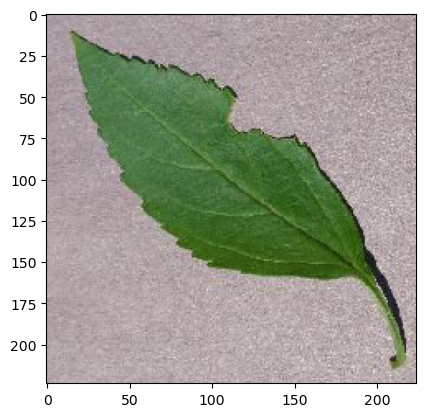

In [15]:
img = train_gen[0][0][0]/255.0
img.dtype
plt.imshow(img)

## Build CNN Model

In [28]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Dense, Flatten,Dropout
model= Sequential()

model.add(Conv2D(64, 3, input_shape=(IMG_DIM, IMG_DIM, 3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(96, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
#Fully C L
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(38, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
MODEL_PATH = 'saved-mode/pdcnn1-best'

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 96)      55392     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       110720    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 128)     

## Train & Save Modle

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[checkpoint],
)

Epoch 1/30
513/513 [==============================] - ETA: 0s - loss: 2.7730 - accuracy: 0.2953
Epoch 1: val_loss improved from inf to 1.11981, saving model to saved-mode\pdcnn1-best
513/513 [==============================] - 198s 369ms/step - loss: 2.7730 - accuracy: 0.2953 - val_loss: 1.1198 - val_accuracy: 0.6689
Epoch 2/30
513/513 [==============================] - ETA: 0s - loss: 1.0941 - accuracy: 0.6721
Epoch 2: val_loss improved from 1.11981 to 0.57850, saving model to saved-mode\pdcnn1-best
513/513 [==============================] - 182s 354ms/step - loss: 1.0941 - accuracy: 0.6721 - val_loss: 0.5785 - val_accuracy: 0.8266
Epoch 3/30
513/513 [==============================] - ETA: 0s - loss: 0.7096 - accuracy: 0.7835
Epoch 3: val_loss improved from 0.57850 to 0.42969, saving model to saved-mode\pdcnn1-best
513/513 [==============================] - 181s 351ms/step - loss: 0.7096 - accuracy: 0.7835 - val_loss: 0.4297 - val_accuracy: 0.8713
Epoch 4/30
513/513 [==================

## Plot Modle History

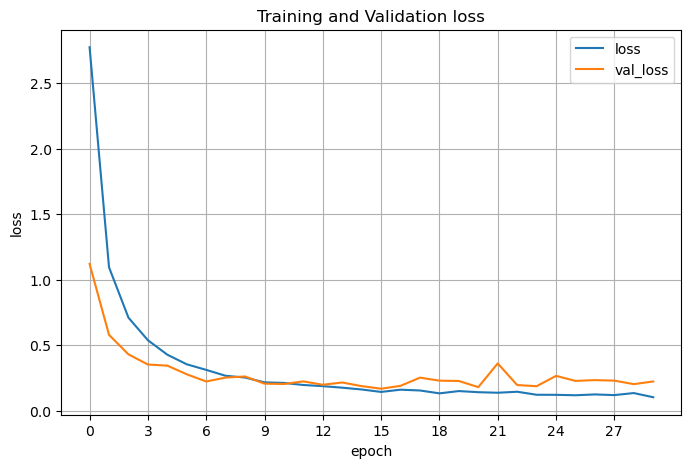

In [37]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['loss', 'val_loss'], figsize=(8, 5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 30, 3))
plt.show()

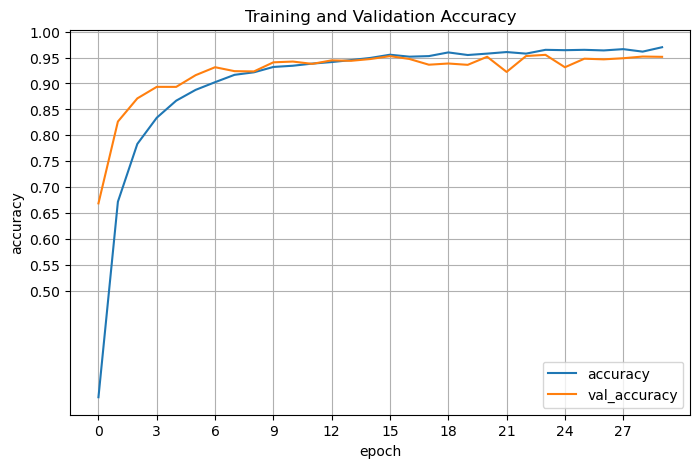

In [38]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(8, 5))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 30, 3))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

## Read test data

In [39]:
pwd

'd:\\datascince\\Plant Diseases'

In [40]:
df_test = create_dataframe(os.path.join(DATA_PATH, 'test'))


In [41]:
test_gen = ImageDataGenerator().flow_from_dataframe(
    df_test,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    shuffle=False,
    batch_size=128,
)

Found 17570 validated image filenames belonging to 38 classes.


## Test Modle & Loading best weights

In [42]:
print(MODEL_PATH)
model.load_weights(MODEL_PATH)

saved-mode/pdcnn1-best


In [43]:

model.evaluate(test_gen)

138/138 [==============================] - 128s 914ms/step - loss: 0.1563 - accuracy: 0.9548


[0.15626884996891022, 0.954809308052063]

# Analyzing & Test model


In [44]:
pwd

'd:\\datascince\\Plant Diseases'

In [45]:
dft=create_dataframe(os.path.join('testd'))

In [46]:
dft

,filename,class
0,testd\test\aaa.JPG,test
1,testd\test\aaaa.JPG,test
2,testd\test\AppleCedarRust1.JPG,test
3,testd\test\AppleCedarRust2.JPG,test
4,testd\test\AppleCedarRust3.JPG,test
5,testd\test\AppleCedarRust4.JPG,test
6,testd\test\AppleScab1.JPG,test
7,testd\test\AppleScab2.JPG,test
8,testd\test\AppleScab3.JPG,test
9,testd\test\CornCommonRust1.JPG,test


In [47]:
dft_gen = ImageDataGenerator().flow_from_dataframe(
    dft,
    target_size=(IMG_DIM, IMG_DIM),
)

Found 35 validated image filenames belonging to 1 classes.


### Saliency maps

In [48]:
import tensorflow as tf

def saliency_map(img):
    
    plt.imshow(img/255.0)
    plt.show()
   


    x = tf.Variable(np.expand_dims(img, 0), dtype='float32')

    with tf.GradientTape() as tape:
        result = model(x)
        y = result[:, np.argmax(result)]
        grads = tape.gradient(y, x)

    grads_2d = grads.numpy()[0].max(axis=2)
    grads_2d_norm = (grads_2d - grads_2d.min())/(grads_2d.max() - grads_2d.min())

    grads_2d_uint8 = (grads_2d_norm*255.0).astype('uint8')
    _, grads_2d_bin = cv2.threshold(grads_2d_uint8, 0, 255, cv2.THRESH_OTSU)
    plt.imshow(grads_2d_bin, cmap='gray')
    plt.show()
    
    print(CLASSES[np.argmax(result)])

In [49]:
import tensorflow as tf

def per_map(img):
    
    plt.imshow(img)
    plt.show()
   


    x = tf.Variable(np.expand_dims(img, 0), dtype='float32')

    with tf.GradientTape() as tape:
        result = model(x)
        y = result[:, np.argmax(result)]
        grads = tape.gradient(y, x)

    
    print(CLASSES[np.argmax(result)])

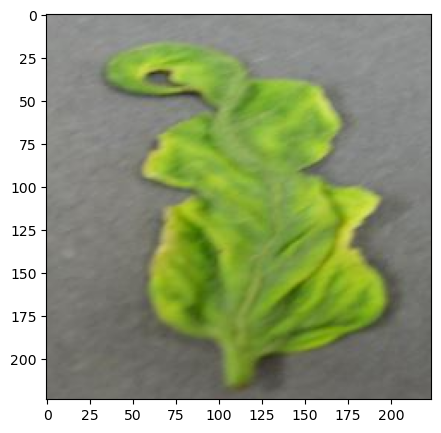

(224, 224, 3)

In [57]:
img_path = 'testd/test/TomatoYellowCurlVirus5.JPG'
img2 = imread(img_path)
imshow(img2/255.0)
img2.shape

In [53]:
img2.shape

(224, 224, 3)

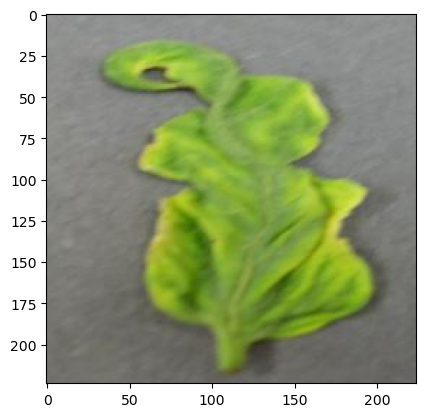

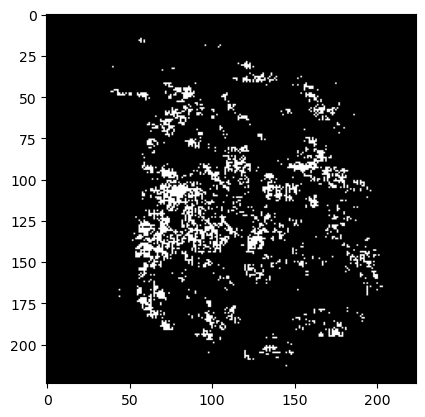

Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [58]:

saliency_map(img2)    



## Save in TFlite format

In [59]:
TF_LITE_MODEL_FILE_NAME = "plant Diseases(94.6).tflite"

In [60]:
import tensorflow as tf

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\ahmed\AppData\Local\Temp\tmpnf4c0r7j\assets


INFO:tensorflow:Assets written to: C:\Users\ahmed\AppData\Local\Temp\tmpnf4c0r7j\assets


In [61]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

19725808

In [62]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [63]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
     

In [64]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 19263.484 Kilobytes
